# **ANALYSE EXPLORATOIRE DE DONNEES ET ENTRAINEMENT DE MODELES**

## **Chargement et prétraitement des données**

In [45]:
# Imortation de bibliothèque
import pandas as pd

# chargement des données
df = pd.read_csv('SuperMarket Analysis.csv')

# Afficher les premières lignes du DataFrame
display(df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [46]:
# Inforation sur les données
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

None

In [47]:
# Vérification des types de données des colonnes
display(df.dtypes)

,0
Invoice ID,object
Branch,object
City,object
Customer type,object
Gender,object
Product line,object
Unit price,float64
Quantity,int64
Tax 5%,float64
Sales,float64


In [48]:
# Convertir le type de la colonne 'Date' et 'Time'
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.time

In [49]:
# Vérification des modifications
display(df[['Date','Time']].head())

,Date,Time
0,2019-01-05,13:08:00
1,2019-03-08,10:29:00
2,2019-03-03,13:23:00
3,2019-01-27,20:33:00
4,2019-02-08,10:37:00


In [50]:
# Vérification des valeurs manquantes
display(df.isnull().sum())

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Sales,0


In [51]:
# Vérification des doublons
display(df.duplicated().sum())

np.int64(0)

In [52]:
# Statistique Descriptive des colonnes numériques
display(df.describe())

,Unit price,Quantity,Tax 5%,Sales,Date,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,2019-02-14 00:05:45.600000,307.58738,4.761905e+00,15.379369,6.97270
min,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,2019-02-13 00:00:00,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,2019-03-08 00:00:00,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,2019-03-30 00:00:00,993.00000,4.761905e+00,49.650000,10.00000
std,26.494628,2.923431,11.708825,245.885335,NaN,234.17651,6.131498e-14,11.708825,1.71858


## **Analyse de données**

### **Analyse Univariée**

#### **Variables quantitatives**

**Histogrammes**

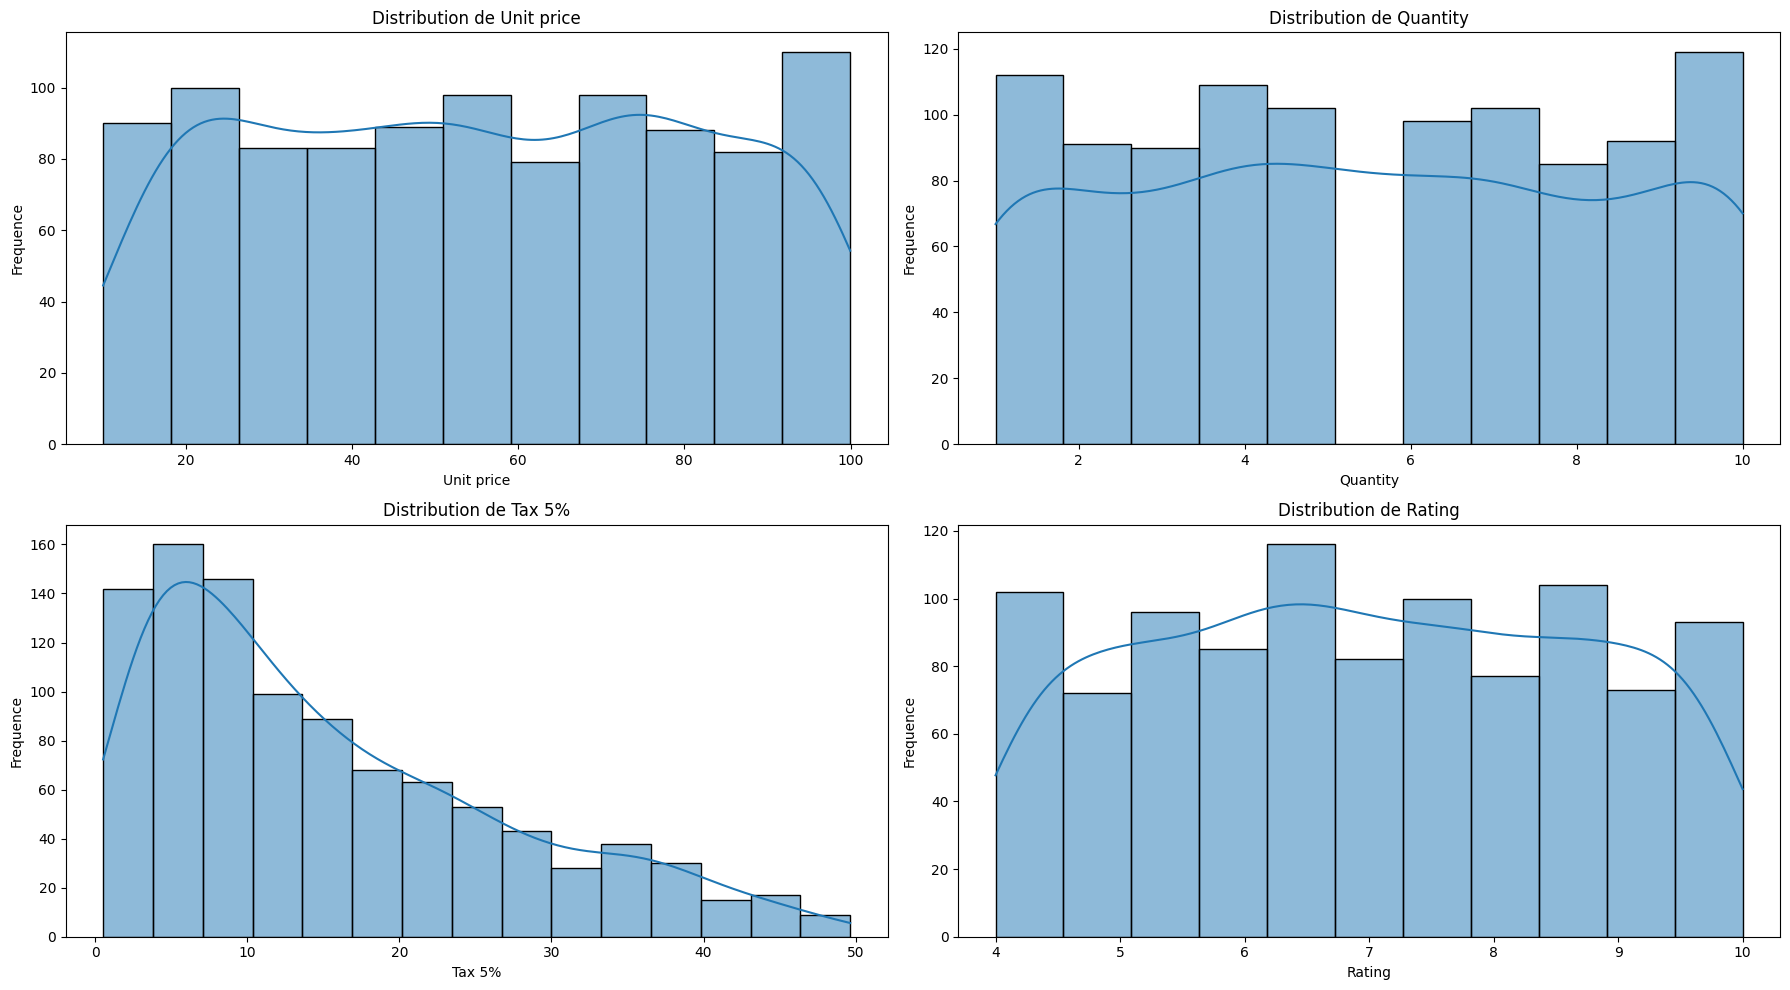

In [53]:
# Importation de bibliothèques
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramme des variables numériques
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Rating']

# Création de Subplot
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequence')

plt.tight_layout()
plt.show()

**Boxplots**

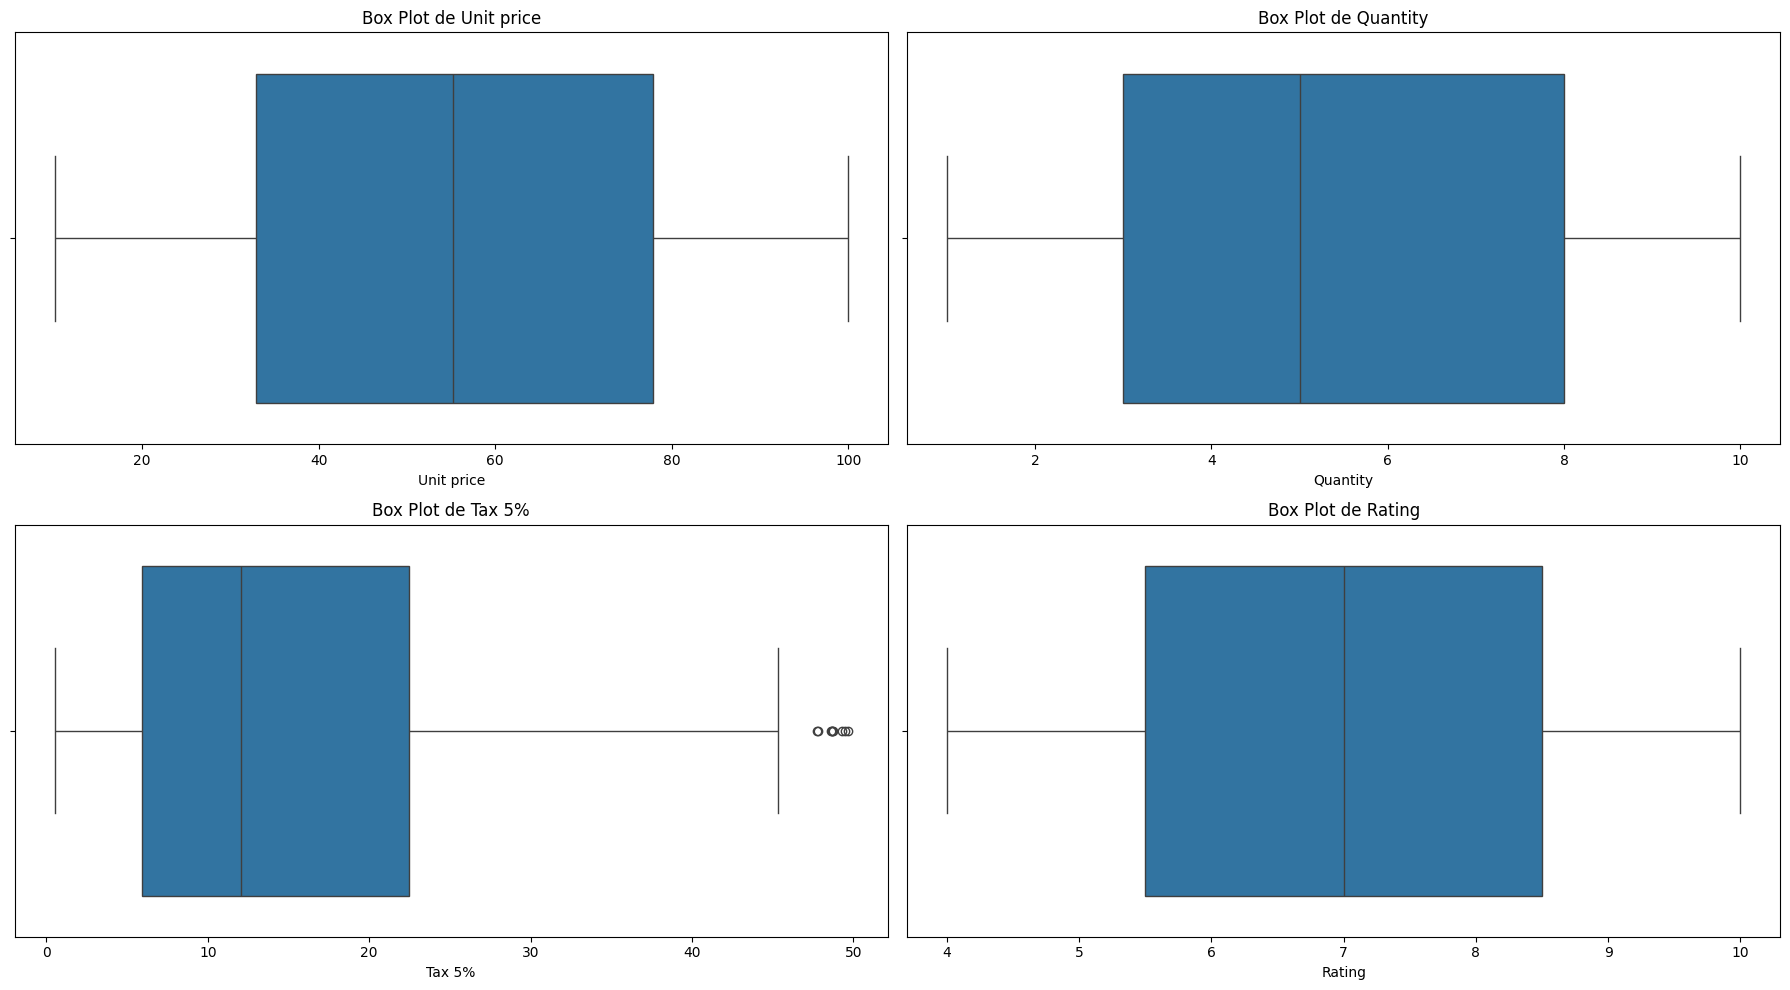

In [54]:
# Boxplot des variables numériques
# Création de Subplot
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot de {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

#### **Variables catégorielles**

In [55]:
# Statistique descriptive des variables catégorielles
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print("Statistiques descriptives pour les variables catégorielles:")
display(df[categorical_cols].describe())

Statistiques descriptives pour les variables catégorielles:


,Invoice ID,Branch,City,Customer type,Gender,Product line,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,506,3
top,849-09-3807,Alex,Yangon,Member,Female,Fashion accessories,19:48:00,Ewallet
freq,1,340,340,565,571,178,7,345


**Diagrammes circulaires**

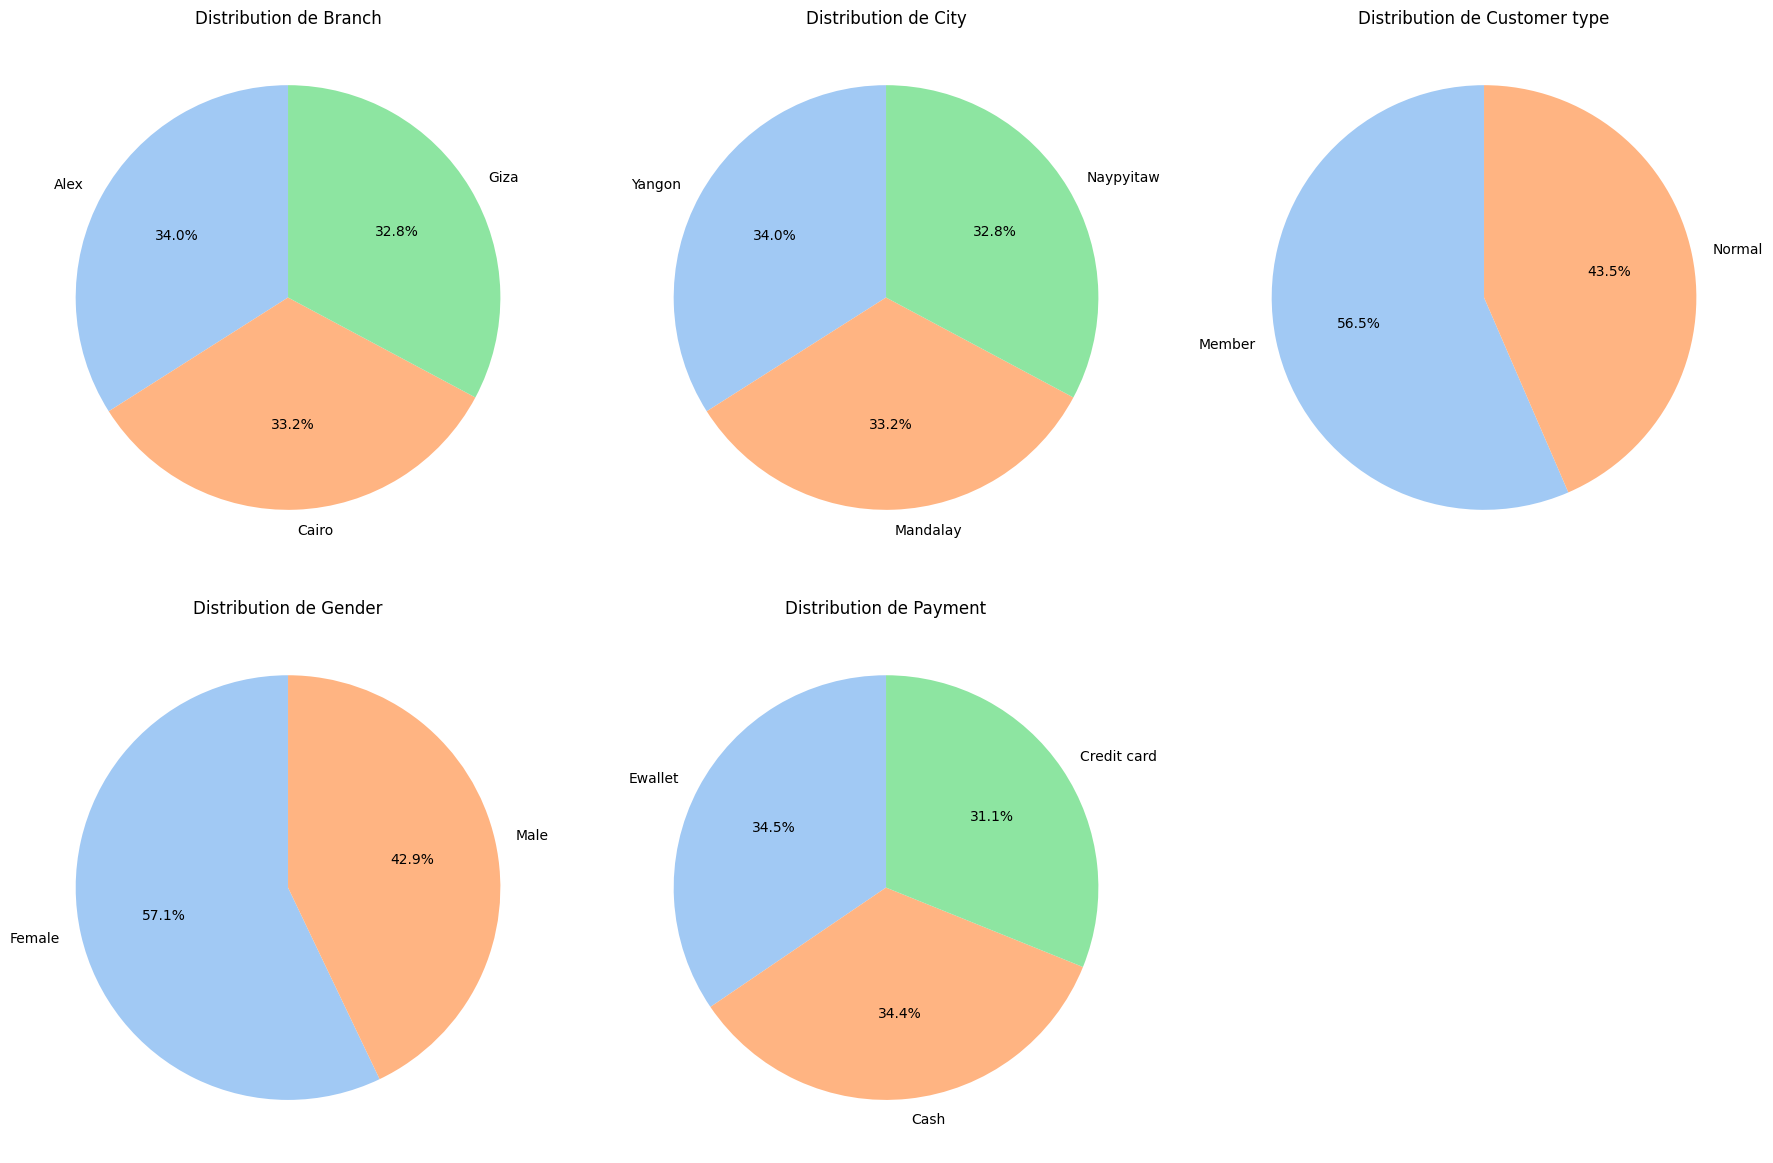

In [56]:
# Diagrammes circulaires des variables catégorielles
# Sélection des variables
categorical_cols_pie = ['Branch', 'City', 'Customer type', 'Gender', 'Payment']

# Création de subplots
# Calculez le nombre de lignes et de colonnes pour les subplots
n_cols = 3
n_rows = (len(categorical_cols_pie) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 6))
axes = axes.flatten()
for i, col in enumerate(categorical_cols_pie):
    df[col].value_counts().plot.pie(ax=axes[i], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    axes[i].set_title(f'Distribution de {col}')
    axes[i].set_ylabel('')

# Masquer tous les sous-graphiques inutilisés
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Diagramme à barres**

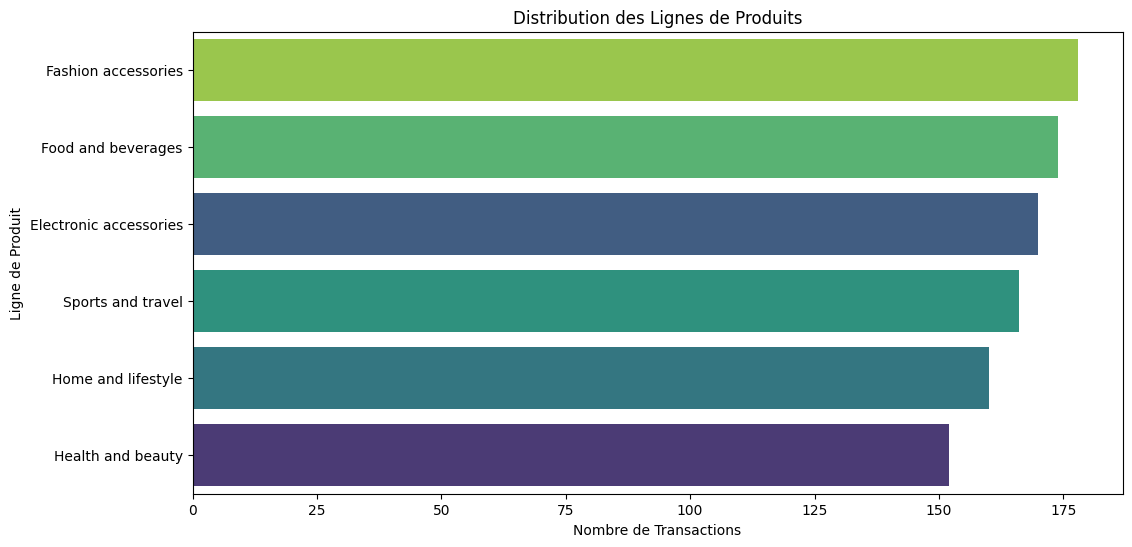

In [57]:
# Diagramme à barres de la variables 'Product line'
plt.figure(figsize=(12, 6))
sns.countplot(y='Product line', data=df, order=df['Product line'].value_counts().index, palette='viridis', hue='Product line', legend=False) # Added hue and legend=False
plt.title('Distribution des Lignes de Produits')
plt.xlabel('Nombre de Transactions')
plt.ylabel('Ligne de Produit')
plt.show()

### **Analyse Bivariée**

#### **Variables numériques**

**Matrice de corrélation**

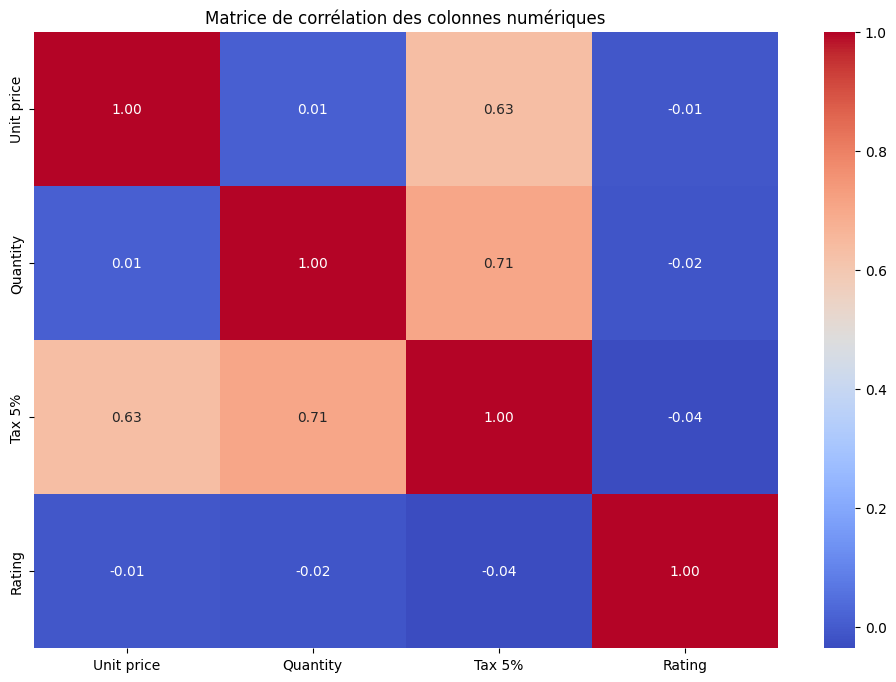

In [58]:
# Etude de corrélation
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation des colonnes numériques')
plt.show()

#### **Variables catégorielles**

In [59]:
# Relations entre deux variables catégorielles : Tableaux de contingence

# Sélectionnez les paires de variables catégorielles à analyser
categorical_pairs = [('Branch', 'Customer type'), ('City', 'Gender'), ('Product line', 'Payment')]

for cat1, cat2 in categorical_pairs:
    print(f"\n--- Tableau de contingence {cat1} et {cat2} ---")
    display(pd.crosstab(df[cat1], df[cat2]))


--- Tableau de contingence Branch et Customer type ---


Customer type,Member,Normal
Branch,,
Alex,190,150
Cairo,181,151
Giza,194,134



--- Tableau de contingence City et Gender ---


Gender,Female,Male
City,,
Mandalay,184,148
Naypyitaw,200,128
Yangon,187,153



--- Tableau de contingence Product line et Payment ---


Payment,Cash,Credit card,Ewallet
Product line,,,
Electronic accessories,71,46,53
Fashion accessories,57,56,65
Food and beverages,57,61,56
Health and beauty,49,50,53
Home and lifestyle,51,45,64
Sports and travel,59,53,54


#### **Variables numériques VS Variables catégorielles**

**Boxplot et Vilonplot**

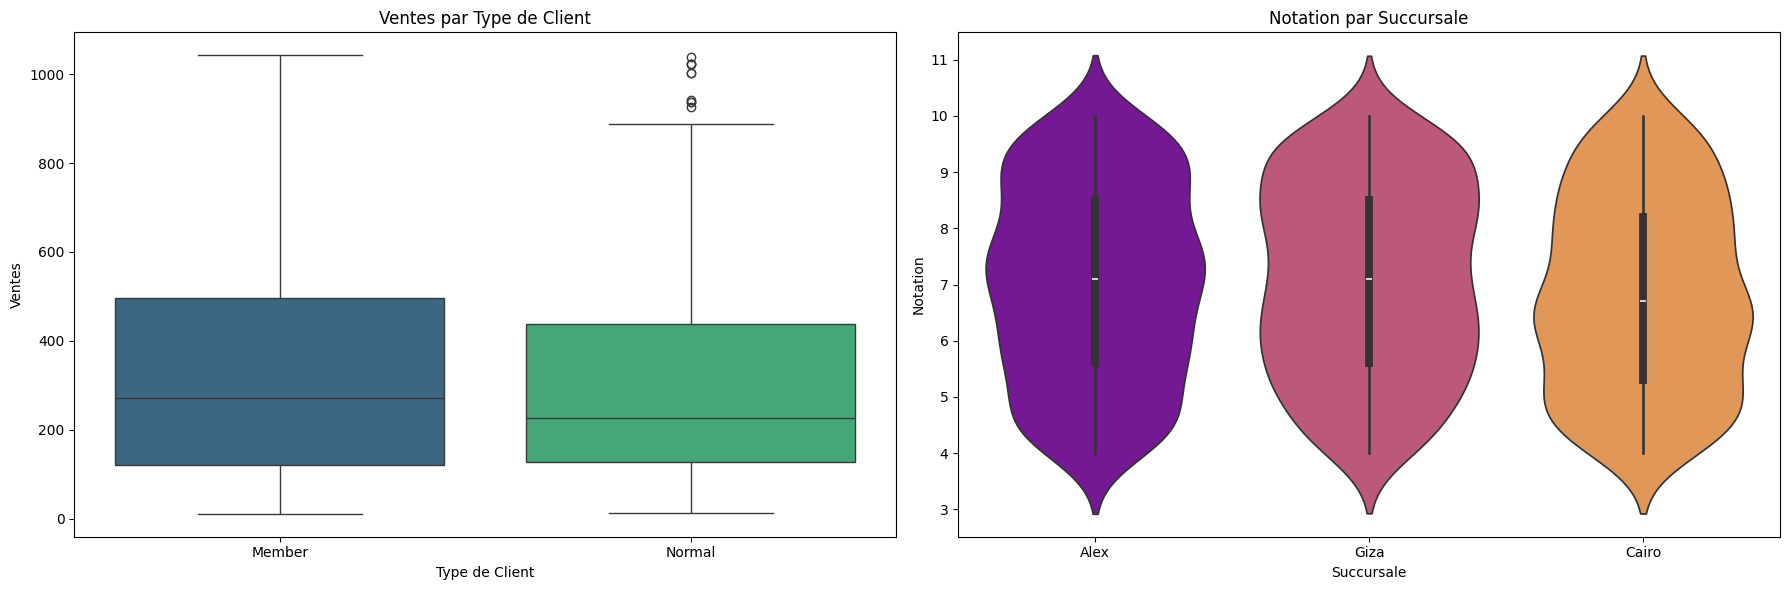

In [60]:
# Relations entre une variable numérique et une variable catégorielle
# Création du subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))
# Tracer les ventes par type de client
sns.boxplot(x='Customer type', y='Sales', data=df, palette='viridis', hue='Customer type', legend=False, ax=axes[0])
axes[0].set_title('Ventes par Type de Client')
axes[0].set_xlabel('Type de Client')
axes[0].set_ylabel('Ventes')

# Tracer la notation par succursale
sns.violinplot(x='Branch', y='Rating', data=df, palette='plasma', hue='Branch', legend=False, ax=axes[1])
axes[1].set_title('Notation par Succursale')
axes[1].set_xlabel('Succursale')
axes[1].set_ylabel('Notation')

plt.tight_layout()
plt.show()

## **Feature Engineering**

In [61]:
# Ajout de colonnes synthétiques
import numpy as np
np.random.seed(42)

# Stock initial
df['stock_initial'] = df['Quantity'] + np.random.randint(0, 30, size=len(df))

# Jours avant péremption
df['jours_avant_peremption'] = np.random.randint(1, 60, size=len(df))

# Surplus (Variable cible)
df['surplus'] = df['stock_initial'] - df['Quantity']

# Jours de la semaine
df['jour_semaine'] = df['Date'].dt.dayofweek

# Mois
df['mois'] = df['Date'].dt.month

# Supprimer 'Date' et 'Time'
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Supprimer d'autres variables
df.drop(['Invoice ID', 'Sales', 'gross income',
         'Tax 5%', 'Rating', 'Customer type', 'Gender',
         'cogs', 'gross margin percentage', 'Payment'], axis=1, inplace=True)

In [62]:
# Afficher les premières lignes
display(df.head())

,Branch,City,Product line,Unit price,Quantity,stock_initial,jours_avant_peremption,surplus,jour_semaine,mois
0,Alex,Yangon,Health and beauty,74.69,7,13,17,6,5,1
1,Giza,Naypyitaw,Electronic accessories,15.28,5,24,21,19,4,3
2,Alex,Yangon,Home and lifestyle,46.33,7,35,14,28,6,3
3,Alex,Yangon,Health and beauty,58.22,8,22,9,14,6,1
4,Alex,Yangon,Sports and travel,86.31,7,17,46,10,4,2


In [63]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Branch                  1000 non-null   object 
 1   City                    1000 non-null   object 
 2   Product line            1000 non-null   object 
 3   Unit price              1000 non-null   float64
 4   Quantity                1000 non-null   int64  
 5   stock_initial           1000 non-null   int64  
 6   jours_avant_peremption  1000 non-null   int64  
 7   surplus                 1000 non-null   int64  
 8   jour_semaine            1000 non-null   int32  
 9   mois                    1000 non-null   int32  
dtypes: float64(1), int32(2), int64(4), object(3)
memory usage: 70.4+ KB


None

In [64]:
# Enregistrer le DataFrame traité dans un fichier CSV
df.to_csv('data/donnees_traitees.csv', index=False)
print("DataFrame traité enregistré dans 'donnees_traitees.csv'")

DataFrame traité enregistré dans 'donnees_traitees.csv'


## **Construction, entraînement et évaluation de modèles**

### **Préparation des données**

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import warnings

# Ignorer les avertissements pour une sortie plus propre
warnings.filterwarnings('ignore')

**Définition de la cible et des features**

In [66]:
# Définition des features (X) et de la target (y)
features = [
    'Branch', 'City', 'Product line', 'Unit price', 'stock_initial',
    'jours_avant_peremption', 'jour_semaine', 'mois'
]
target = 'surplus'

X = df[features]
y = df[target]

print(f"Features sélectionnées: {features}")
print(f"Variable cible: {target}")

Features sélectionnées: ['Branch', 'City', 'Product line', 'Unit price', 'stock_initial', 'jours_avant_peremption', 'jour_semaine', 'mois']
Variable cible: surplus


**Division des données**

In [67]:
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Encodage et Standardisation de données**

In [68]:
# Création du pipeline de prétraitement
numeric_features = X.select_dtypes(include=['int64', 'float64', 'int32']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])
print("Pipeline de prétraitement créé.")

Pipeline de prétraitement créé.


#### **Construction et entraînement de modèles**

**Définition et comparaison des modèles**

In [71]:
# Définition et évaluation des modèles
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

best_model_name = None
best_r2 = -float('inf')

print("\n--- Évaluation de plusieurs modèles de base ---")
for name, model in models.items():
    # Création du pipeline complet (prétraitement + modèle)
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])

    # Entraînement
    pipeline.fit(X_train, y_train)

    # Prédiction et évaluation
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Modèle: {name}")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R² Score: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name

print(f"\nMeilleur modèle de base identifié: {best_model_name} (R² = {best_r2:.4f})")


--- Évaluation de plusieurs modèles de base ---
Modèle: Linear Regression
  Mean Absolute Error (MAE): 2.34
  Mean Squared Error (MSE): 7.91
  R² Score: 0.9073
Modèle: Random Forest
  Mean Absolute Error (MAE): 2.30
  Mean Squared Error (MSE): 7.80
  R² Score: 0.9086
Modèle: Gradient Boosting
  Mean Absolute Error (MAE): 2.28
  Mean Squared Error (MSE): 7.44
  R² Score: 0.9128

Meilleur modèle de base identifié: Gradient Boosting (R² = 0.9128)


#### **Optimisation du modèle**

In [72]:
# Optimisation du meilleur modèle avec GridSearchCV
print("\n--- Optimisation du modèle Gradient Boosting avec GridSearchCV ---")

# Pipeline pour GridSearch
pipeline_gb = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', GradientBoostingRegressor(random_state=42))])

# Définition de la grille de paramètres à tester
param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

grid_search = GridSearchCV(pipeline_gb, param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(f"\nMeilleurs paramètres trouvés: {grid_search.best_params_}")
print(f"Meilleur score R² sur la validation croisée: {grid_search.best_score_:.4f}")


--- Optimisation du modèle Gradient Boosting avec GridSearchCV ---
Fitting 5 folds for each of 8 candidates, totalling 40 fits

Meilleurs paramètres trouvés: {'regressor__learning_rate': 0.05, 'regressor__max_depth': 3, 'regressor__n_estimators': 100}
Meilleur score R² sur la validation croisée: 0.9002


### **Evaluation du modèle**

In [73]:
# Évaluation du modèle optimisé sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
final_mae = mean_absolute_error(y_test, y_pred_best)
final_mse = mean_squared_error(y_test, y_pred_best)
final_r2 = r2_score(y_test, y_pred_best)

print(f"\nPerformance du modèle final optimisé sur l'ensemble de test:")
print(f"  Final MAE: {final_mae:.2f}")
print(f"  Final MSE: {final_mse:.2f}")
print(f"  Final R² Score: {final_r2:.4f}")



Performance du modèle final optimisé sur l'ensemble de test:
  Final MAE: 2.28
  Final MSE: 7.31
  Final R² Score: 0.9143


In [74]:
# Entraînement du modèle final sur toute les données
print("\n--- Entraînement du modèle final sur l'ensemble des données ---")
final_model = grid_search.best_estimator_
final_model.fit(X, y)
print("Modèle final entraîné.")


--- Entraînement du modèle final sur l'ensemble des données ---
Modèle final entraîné.
